# Asymptotic Confidence Intervals

## Asymptotic Confidence Interval for $\mu$ 

A $100(1-\alpha)\%$ **asymptotic** confidence interval for $\mu$ with a **unknown** $\sigma^2$ is:
$\big[\bar{X} - z_{1-\alpha/2}*\frac{s}{\sqrt n}, \bar{X} + z_{1-\alpha/2}*\frac{s}{\sqrt n}\big]$.

Here is a simulation study example ([code main source](http://web.stanford.edu/class/stats110/notes/Chapter5/Large_sample_CI.html)).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

def CI(X, confidence=0.95):
    alpha = 1 - confidence
    X = np.asarray(X)
    n = X.shape[0]
    Xbar = np.mean(X)
    s = np.std(X) * np.sqrt(n / (n-1)) # when n is large this factor
                                       # have little effect
    quantile = norm.ppf(1 - alpha /  2)
    lower = Xbar - quantile * s / np.sqrt(n)
    upper = Xbar + quantile * s / np.sqrt(n)
    
    return lower, upper

myrv = expon(scale=4)

Text(0.5, 1.0, '94 of 100 cover the true mean')

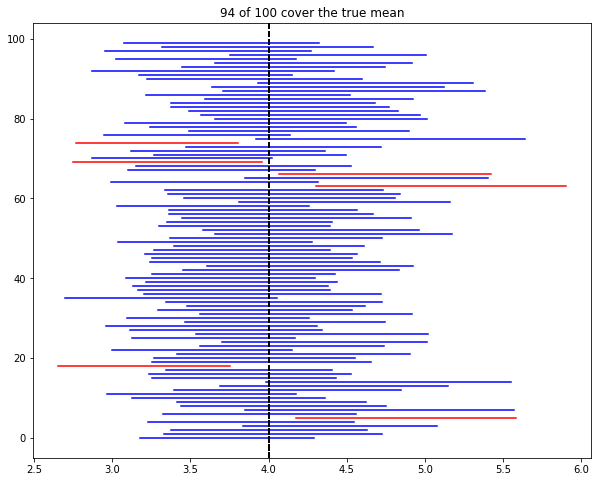

In [16]:
ninterval = 100
f = plt.figure(figsize=(10, 8))
ax = f.gca()
covered = 0
for i in range(ninterval):
    X = myrv.rvs(size=(100,))
    L, U = CI(X, confidence=0.9)
    cover = (L < myrv.mean()) * (U > myrv.mean())
    ax.plot([L, U], [i, i], color={True:'blue', False:'red'}[cover])
    ax.axvline(myrv.mean(), c='k', linestyle='--')
    covered += cover
ax.set_title('%d of %d cover the true mean' % (covered, ninterval))

## Asymptotic Confidence Interval for Population Proportion p 

A $100(1-\alpha)\%$ **asymptotic** confidence interval for p is:
$\big[\hat{p} - z_{1-\alpha/2}*\sqrt\frac{\hat{p}(1-\hat{p})}{n}, \bar{X} + z_{1-\alpha/2}*\frac{s}{\sqrt n}\big]$.

In [18]:
import statsmodels as sm
from statsmodels.stats.proportion import proportion_confint   

ModuleNotFoundError: No module named 'statsmodels'

In [46]:
proportion_confint(count = 33, nobs = 78, alpha=0.05, method='normal')

(0.3134368253908742, 0.5327170207629719)

##### Session Info

In [ ]:
import session_info
session_info.show()